In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
raw_data = pd.read_table('data/VDJDB_full_ab.txt')
print(raw_data.shape)
n_samples = raw_data.shape[0]
raw_data.head()

(22143, 38)


,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score,genP_1mism_alpha,genP_0mism_alpha,genP_1mism_beta,genP_0mism_beta
0,NaN,NaN,NaN,CASSSGQLTNTEAFF,TRBV9*01,NaN,TRBJ1-1*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSSGQLTNTEAFF"", ""cdr3_old"": ""CASSS...",1,NaN,NaN,2.070000e-07,2.333333e-09
1,NaN,NaN,NaN,CASSASARPEQFF,TRBV9*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSASARPEQFF"", ""cdr3_old"": ""CASSASA...",0,NaN,NaN,1.500000e-08,0.000000e+00
2,NaN,NaN,NaN,CASSSGLLTADEQFF,TRBV9*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSSGLLTADEQFF"", ""cdr3_old"": ""CASSS...",0,NaN,NaN,2.000000e-09,0.000000e+00
3,NaN,NaN,NaN,CASSSGQVSNTGELFF,TRBV9*01,NaN,TRBJ2-2*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CASSSGQVSNTGELFF"", ""cdr3_old"": ""CASS...",0,NaN,NaN,1.180000e-07,1.666667e-09
4,NaN,NaN,NaN,CSARDRTGNGYTF,TRBV20-1*01,NaN,TRBJ1-2*01,HomoSapiens,HLA-A*02:01,B2M,...,HLA-A*02:01,NaN,NaN,NaN,"{""cdr3"": ""CSARDRTGNGYTF"", ""cdr3_old"": ""CSARDRT...",2,NaN,NaN,1.660000e-07,4.333333e-09


In [44]:
x = pd.notnull(raw_data.iloc[:, 0])
y = pd.notnull(raw_data.iloc[:, 3])
valid = [x[i] and y[i] for i in range(n_samples)]
print(sum(valid))
data_pd = raw_data.iloc[valid, [0, 3, 34, 35, 36, 37]].drop_duplicates()
n_samples = data_pd.shape[0]
print(data_pd.shape)
data_pd.head()

1560
(1362, 6)


,cdr3.alpha,cdr3.beta,genP_1mism_alpha,genP_0mism_alpha,genP_1mism_beta,genP_0mism_beta
78,CAGNNARPMF,CASSQSPGGVAFF,1.450533e-05,0.000000,6.700000e-08,1.000000e-09
79,CAGNNARLMF,CASSQSPGGVAFF,1.621160e-04,0.000015,6.700000e-08,1.000000e-09
80,CAGNNARLVF,CASSQSPGGTQYF,1.450600e-05,0.000000,7.816667e-07,1.300000e-08
81,CAEGFASSDGQKLLF,CASSQSPGGTQYF,3.000000e-09,0.000000,7.816667e-07,1.300000e-08
82,CAGNNARLMF,CSARDRHREWLHF,1.621160e-04,0.000015,0.000000e+00,0.000000e+00


In [121]:
data = data_pd.as_matrix()
minvalue = np.min(data[data[:, 3] > 0, 2])
data[data[:, 2] == 0, 2] = minvalue
data[data[:, 4] == 0, 4] = minvalue
data[data[:, 3] == 0, 3] = minvalue
data[data[:, 5] == 0, 5] = minvalue

In [124]:
int(np.log2(minvalue))

-28

In [172]:
# d is pd Data Frame with two columns: sequence and p
def Statistics1(array, n_bins):
    minv, maxv = np.min(array), np.max(array)
    statistics = np.zeros((n_bins), dtype=float)
    for x in array:
        x_bin = min(n_bins - 1, 
                    int((x - minv) / (maxv - minv) * n_bins))
        statistics[x_bin] += 1
    return statistics

def Statistics(array, step=1):
    minv, maxv = np.min(array), np.max(array)
    statistics = np.zeros((int((maxv - minv) / step) + 1))
    
    for x in array:
        statistics[int((x - minv) / step)] += 1
    
    return statistics / np.sum(statistics), int(minv)

def ProbDist(d):
    d1 = pd.DataFrame(d).drop_duplicates().as_matrix()
    d1[:, 1] = d1[:, 1]
    return d1

# p is sample probability distribution numpy array
def ShanonEntropy(p):
    x = p * np.log(p)
    x[p == 0] = 0
    return -np.sum(x)

# x is beta, the entropy parametr
def RenyiEntropy(p, x):
    p1 = np.array(p, dtype=np.float)
    if x == 1:
        return ShanonEntropy(p1)
    return np.log(np.sum(np.power(p1, x))) / (1 - x)

# gen P 1

In [193]:
pa, pb = 2, 4
sa, sb = 0, 1
step = 1

In [194]:
alpha_dist = ProbDist(data[:, [sa, pa]])
beta_dist = ProbDist(data[:, [sb, pb]])

alpha_dist_log2 = np.log2([float(x) for x in alpha_dist[:, 1]])
beta_dist_log2 = np.log2([float(x) for x in beta_dist[:, 1]])

alpha_log_stat, min_alpha_log = Statistics(alpha_dist_log2, step)
beta_log_stat, min_beta_log = Statistics(beta_dist_log2, step)

max_alpha_log = min_alpha_log + alpha_log_stat.shape[0]
max_beta_log = min_beta_log + beta_log_stat.shape[0]


pair_dist_log2 = np.array([np.log2(data[i, pa]) + np.log2(data[i, pb]) for i in range(data.shape[0])])
pair_log_stat, min_pair_log = Statistics(pair_dist_log2, step)
max_pair_log = min_pair_log + pair_log_stat.shape[0]


min_rpair_log = min_alpha_log + min_beta_log
max_rpair_log = max_alpha_log + max_beta_log
rpair_log_stat = np.zeros((max_rpair_log - min_rpair_log))
for ia, xa in enumerate(alpha_log_stat):
    for ib, xb in enumerate(beta_log_stat):
        rpair_log_stat[ia + ib] += xa * xb

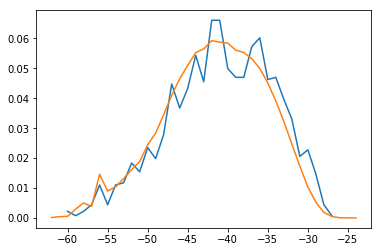

In [195]:
plt.plot(np.arange(min_pair_log, max_pair_log), pair_log_stat)
plt.plot(np.arange(min_rpair_log, max_rpair_log), rpair_log_stat)

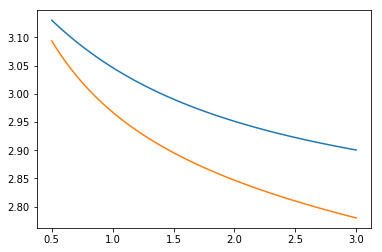

In [203]:
x = np.linspace(.5, 3., 100)
RE_pair = [RenyiEntropy(pair_log_stat, i) for i in x]
RE_rpair = [RenyiEntropy(rpair_log_stat, i) for i in x]
plt.plot(x, RE_pair)
plt.plot(x, RE_rpair)

# gen p 0

In [204]:
pa, pb = 3, 5
sa, sb = 0, 1
step = 1

In [205]:
alpha_dist = ProbDist(data[:, [sa, pa]])
beta_dist = ProbDist(data[:, [sb, pb]])

alpha_dist_log2 = np.log2([float(x) for x in alpha_dist[:, 1]])
beta_dist_log2 = np.log2([float(x) for x in beta_dist[:, 1]])

alpha_log_stat, min_alpha_log = Statistics(alpha_dist_log2, step)
beta_log_stat, min_beta_log = Statistics(beta_dist_log2, step)

max_alpha_log = min_alpha_log + alpha_log_stat.shape[0]
max_beta_log = min_beta_log + beta_log_stat.shape[0]


pair_dist_log2 = np.array([np.log2(data[i, pa]) + np.log2(data[i, pb]) for i in range(data.shape[0])])
pair_log_stat, min_pair_log = Statistics(pair_dist_log2, step)
max_pair_log = min_pair_log + pair_log_stat.shape[0]


min_rpair_log = min_alpha_log + min_beta_log
max_rpair_log = max_alpha_log + max_beta_log
rpair_log_stat = np.zeros((max_rpair_log - min_rpair_log))
for ia, xa in enumerate(alpha_log_stat):
    for ib, xb in enumerate(beta_log_stat):
        rpair_log_stat[ia + ib] += xa * xb

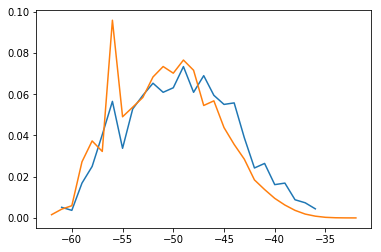

In [206]:
plt.plot(np.arange(min_pair_log, max_pair_log), pair_log_stat)
plt.plot(np.arange(min_rpair_log, max_rpair_log), rpair_log_stat)

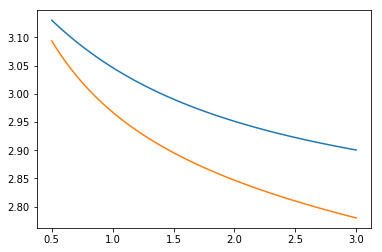

In [207]:
x = np.linspace(.5, 3., 100)
RE_pair = [RenyiEntropy(pair_log_stat, i) for i in x]
RE_rpair = [RenyiEntropy(rpair_log_stat, i) for i in x]
plt.plot(x, RE_pair)
plt.plot(x, RE_rpair)